<a href="https://colab.research.google.com/github/vanshbaba/Data-science/blob/main/Taitanic_data_pradiction_Vansh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**VANSH BAHADUR DHURVE**
##**<//=============Taitanic Prediction==============//>**##

##**Prediction Object**


*   **What types of people was survive in that condition?**
*   **Which age criteria people was survived in that condition?**



###**Loading Required libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

###**Read dataset Train and test**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic_train=pd.read_csv("/content/drive/MyDrive/train (1).csv") #Train Passenger 892 
titanic_test=pd.read_csv("/content/drive/MyDrive/test (1).csv") # Test Passenger 419

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.shape

(891, 12)

In [ ]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

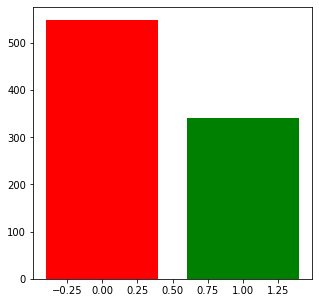

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=["r","g"])
plt.show()
# Death red color
# Survived Green color

In [ ]:
titanic_train['Pclass'].value_counts()
# passenger class 1,2,3

3    491
1    216
2    184
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

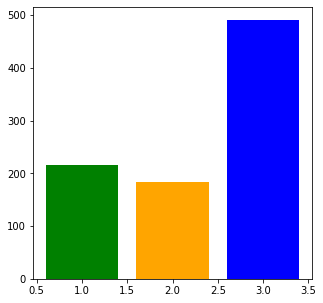

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["blue","green","orange"])

In [ ]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

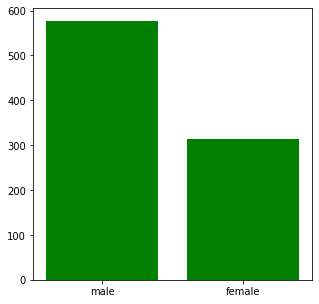

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color="Green")

<function matplotlib.pyplot.show>

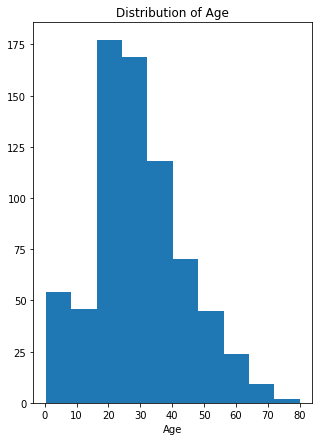

In [ ]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.show

In [ ]:
titanic_train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
titanic_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
sum(titanic_train['Age'].isnull())

177

In [ ]:
titanic_train=titanic_train.dropna()

###**building model**

In [ ]:
x =titanic_train[['Pclass',	'Name',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked']]
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
y = titanic_train[['Survived']]
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


In [ ]:
from sklearn. model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
train_test_split(y, shuffle=False)

[     Survived
 1           1
 3           1
 6           0
 10          1
 11          1
 ..        ...
 645         1
 647         1
 659         0
 662         0
 671         0
 
 [137 rows x 1 columns],      Survived
 679         1
 681         1
 689         1
 690         1
 698         0
 699         0
 700         1
 701         1
 707         1
 710         1
 712         1
 715         0
 716         1
 717         1
 724         1
 730         1
 737         1
 741         0
 742         1
 745         0
 748         0
 751         1
 759         1
 763         1
 765         1
 772         0
 779         1
 781         1
 782         0
 789         0
 796         1
 802         1
 806         0
 809         1
 820         1
 823         1
 835         1
 853         1
 857         1
 862         1
 867         0
 871         1
 872         0
 879         1
 887         1
 889         1]

In [ ]:
sum(titanic_train['Survived'].isnull())
sum(titanic_train['Age'].isnull())

0

In [ ]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

###creates the classification model by building a decision tree
###**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.8142076502732241

In [ ]:
y_pred=dtc.predict(x_train)

In [ ]:
y_pred
# According to indexing(87) who is Survived

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1])

###**Logistic Regression**

Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred = logit.predict(x_train)

# training loss
acc_log = round(logit.score(x_train, y_train) * 125, 2)
print(acc_log)

86.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###**RandomForestClassifier**

###The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42
random_forest = RandomForestClassifier(
    criterion='gini', 
    n_estimators=500,
    max_depth=10,
    random_state=SEED,
)
random_forest.fit(x_train, y_train)  #that fits a number of decision tree classifiers on various sub-samples of the dataset
rf_pred_y = random_forest.predict(x_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


81.42

In [ ]:
score = random_forest.score(x_train, y_train)

In [ ]:
score

0.8142076502732241

In [ ]:
rf_pred_y

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1])

In [ ]:
import sklearn as SVR
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(x_train, y_train)
#SVR()
regr.predict([[1, 1]])
#array([1.5])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
SVC()

SVC()

In [ ]:
score =SVC.score(x_train, y_train)

AttributeError: ignored

##**>//=============Thank you==============//<**